# Red Neuronal Artificial (ANN) para Predecir la Rotación de Clientes

In [1]:
# Importando las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Cargando los datos
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Preprocesamiento de Datos

- Eliminación de columnas no relevantes.
- Codificación de variables categóricas.
- División en conjuntos de entrenamiento y prueba.
- Escalado de características.

In [3]:

# Eliminando columnas no relevantes
df_processed = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Codificación one-hot para variables categóricas
categorical_features = ['Geography', 'Gender']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(df_processed)
transformed_X = pd.DataFrame(transformed_X)

# Separando la variable objetivo
X = transformed_X.iloc[:, :-1].values
y = df_processed['Exited'].values

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Escalando características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Construyendo la Red Neuronal Artificial

In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inicializando la ANN
ann = Sequential()

# Añadiendo la capa de entrada y la primera capa oculta
ann.add(Dense(units=6, activation='relu', input_shape=(X_train.shape[1],)))

# Añadiendo la segunda capa oculta
ann.add(Dense(units=6, activation='relu'))

# Añadiendo la capa de salida
ann.add(Dense(units=1, activation='sigmoid'))

# Compilando la ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
ann.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entrenando la Red Neuronal Artificial

In [5]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5727 - accuracy: 0.7244
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.7943
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7941
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7950
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7968
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8006
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.8067
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4268 - accura

## Evaluación del Modelo y Visualizaciones

- Evaluar el modelo con el conjunto de prueba.
- Generar visualizaciones para entender el rendimiento del modelo.

## Evaluación del Modelo y Métricas de Rendimiento

- Evaluar el modelo con el conjunto de prueba.
- Calcular métricas clave como precisión, recall y F1-score.

In [6]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predicciones del modelo
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


63/63 [==============================] - 0s 1ms/step


(0.8615, 0.7436974789915967, 0.45038167938931295, 0.5610142630744849)

## Visualizaciones

- Crear gráficos para visualizar la matriz de confusión y otras métricas relevantes.

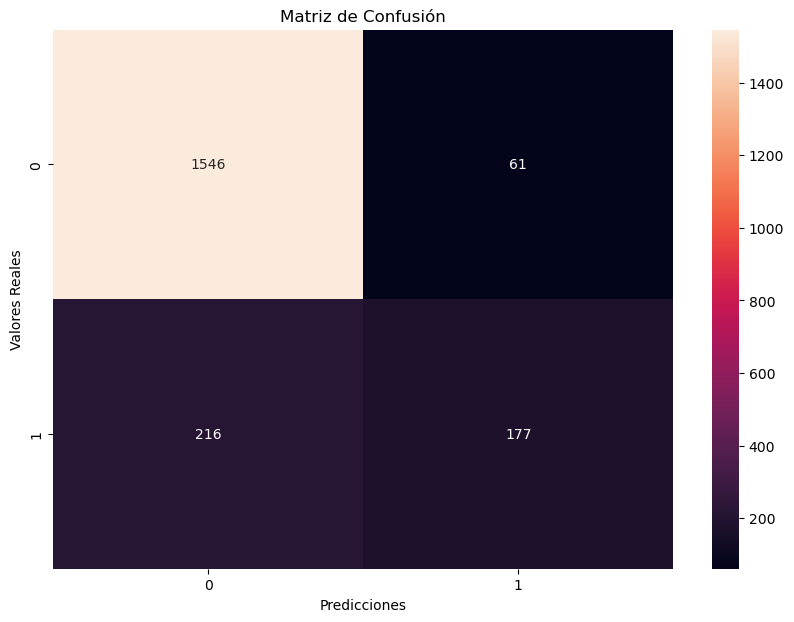

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


## Detalles Matemáticos

- Explicación matemática de conceptos clave como la función de activación, la función de pérdida y el proceso de backpropagation.


La construcción de una Red Neuronal Artificial implica varios conceptos matemáticos clave:

1. **Funciones de Activación**: Como 'relu' y 'sigmoid', determinan la salida de un nodo en la red. 'Relu' proporciona una salida lineal para entradas positivas y cero para entradas negativas. 'Sigmoid' convierte su entrada a un valor entre 0 y 1, lo que la hace adecuada para la salida en clasificaciones binarias.

2. **Función de Pérdida**: En este caso, 'binary_crossentropy' mide el rendimiento de la red en tareas de clasificación binaria. Cuantifica la diferencia entre las salidas previstas y las reales.

3. **Backpropagation**: Es un método para actualizar los pesos de la red de manera eficiente, minimizando la función de pérdida. Utiliza el algoritmo de descenso de gradiente para ajustar los pesos en dirección a la reducción del error.
